## Predicting clickbait based on headlines.
### Marc Blomvliet, Tyche Hampel, Amrish Jhingoer, Visar Jusufi & Lulu Kroon
#### Vrije Universiteit Amsterdam (VU)
#### Project group 85

## Load libraries and dataset.

In [85]:
import sys
import nltk
import sklearn
import pandas
import numpy
import matplotlib.pyplot as plt

# Here I am making sure that my packages are ok.
# Just checking because I don't use jupyter notebook often.
print('Python: {}'.format(sys.version))
print('NLTK: {}'.format(nltk.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))

Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
NLTK: 3.4.5
Scikit-learn: 0.22.1
Pandas: 0.25.1
Numpy: 1.17.2


In [86]:
import pandas as pd
import numpy as np

#load dataset, without or with .dms depands on the file  type Mac and Windows..
# I used both kind Windows and Mac on differnt laptops to train.
df = pd.read_table('real_fakeConv2.dms', header = None, encoding='utf-8', sep=';')

In [87]:
#print info dataset of a few headlines
# All fake though.
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 2 columns):
0    1056 non-null object
1    1055 non-null object
dtypes: object(2)
memory usage: 16.6+ KB
None
      0                                                  1
0  FAKE  BREAKING: First NFL Team Declares Bankruptcy O...
1  FAKE  Court Orders Obama To Pay $400 Million In Rest...
2  FAKE  UPDATE: Second Roy Moore Accuser Works For Mic...
3  FAKE         Oscar Pistorius Attempts To Commit Suicide
4  FAKE        Trump Votes For Death Penalty For Being Gay


REAL    624
FAKE    432
Name: 0, dtype: int64
432
624


Text(0.5, 0.98, 'Categorical Plotting')

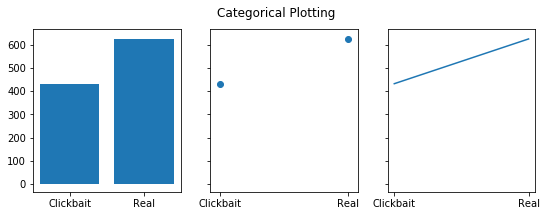

In [88]:
classes = df[0]
print(classes.value_counts())
#print(classes)
#frequency_list = classes.index.tolist()
#print(frequency_list)

fake = classes.eq('FAKE').sum()
real = classes.eq('REAL').sum()
print(fake)
print(real)

#PLOT
data = {'Clickbait': fake, 'Real': real}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

## 2. Data processing

In [89]:
# convert class labels to binary values, 0 = Fake, 1 = Real

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y = encoder.fit_transform(classes)

#check if its fake or real 
print(classes[:10])
print(Y[:10])

0    FAKE
1    FAKE
2    FAKE
3    FAKE
4    FAKE
5    FAKE
6    FAKE
7    FAKE
8    FAKE
9    FAKE
Name: 0, dtype: object
[0 0 0 0 0 0 0 0 0 0]


In [90]:
# store the Headlines data
# WAS text_messages
text_headlines = df[1]
print(text_headlines[:10])

0    BREAKING: First NFL Team Declares Bankruptcy O...
1    Court Orders Obama To Pay $400 Million In Rest...
2    UPDATE: Second Roy Moore Accuser Works For Mic...
3           Oscar Pistorius Attempts To Commit Suicide
4          Trump Votes For Death Penalty For Being Gay
5    Putin says: Ã¢â‚¬ËœPope Francis Is Not A Man O...
6    New York Man Wanted For Infecting 240 Men And ...
7    Saudi Arabia to Behead 6 School Girls for Bein...
8    Malia Obama Fired From Cushy Internship At Spa...
9             Target to Discontinue Sale of Holy Bible
Name: 1, dtype: object


## 2.1 Clean the headlines

In [91]:
# use regular expressions to replace email addresses, URLs, phone numbers, other numbers
# from website: regexlib.com (regular expression library)

# Replace email addresses with 'email'
processed = text_headlines.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', 'moneysymb')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')



In [92]:
# change words to lower case 
# for example- First, FIRST, first are all the same word
processed = processed.str.lower()
#showing it in lower case now.
print(processed[:10])

0    breaking first nfl team declares bankruptcy ov...
1    court orders obama to pay moneysymbnumbr milli...
2    update second roy moore accuser works for mich...
3           oscar pistorius attempts to commit suicide
4          trump votes for death penalty for being gay
5    putin says ã â ëœpope francis is not a man of ...
6    new york man wanted for infecting numbr men an...
7    saudi arabia to behead numbr school girls for ...
8    malia obama fired from cushy internship at spa...
9             target to discontinue sale of holy bible
Name: 1, dtype: object


In [93]:
from nltk.corpus import stopwords

# remove stop words from text messages
stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(term for term in str(x).split() if term not in stop_words))

In [94]:
# Remove word stems using the Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

In [95]:
print(processed[:10])

0    break first nfl team declar bankruptci kneel thug
1    court order obama pay moneysymbnumbr million r...
2    updat second roy moor accus work michel obama ...
3                 oscar pistoriu attempt commit suicid
4                         trump vote death penalti gay
5    putin say ã â ëœpope franci man godã â â must see
6         new york man want infect numbr men women hiv
7    saudi arabia behead numbr school girl male fri...
8    malia obama fire cushi internship spanish embassi
9                     target discontinu sale holi bibl
Name: 1, dtype: object


## 3. Data features

In [96]:
from nltk.tokenize import word_tokenize

all_words = []

for headline in processed:
    words = word_tokenize(headline)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [97]:
# print the total number of words and the 3000 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(3000)))

Number of words: 2816
Most common words: [('â', 526), ('numbr', 226), ('ã', 164), ('trump', 114), ('obama', 101), ('break', 80), ('presid', 64), ('transcript', 59), ('news', 53), ('say', 49), ('senat', 47), ('å', 46), ('clinton', 41), ('u', 35), ('democrat', 34), ('new', 33), ('state', 32), ('debat', 30), ('mccain', 29), ('remark', 29), ('donald', 28), ('offic', 26), ('hillari', 25), ('œ', 25), ('nation', 25), ('tax', 25), ('bill', 25), ('video', 23), ('hous', 23), ('barack', 22), ('health', 22), ('us', 21), ('white', 21), ('week', 20), ('ad', 20), ('first', 19), ('arrest', 19), ('america', 19), ('presidenti', 19), ('call', 19), ('american', 19), ('unit', 19), ('care', 19), ('congress', 19), ('vote', 18), ('john', 18), ('gun', 18), ('year', 18), ('plan', 18), ('campaign', 17), ('report', 17), ('act', 17), ('school', 16), ('million', 15), ('paul', 15), ('support', 15), ('law', 15), ('day', 15), ('polit', 15), ('interview', 15), ('outlook', 15), ('latest', 15), ('moneysymbnumbr', 14), ('

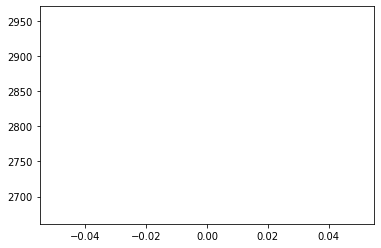

In [98]:
plt.plot(len(all_words))
plt.show()

In [99]:
# The more features the longer the training takes.. using the 1500 most common words as features
word_features = list(all_words.keys())[:3000]

In [100]:
def find_features(headlines):
    words = word_tokenize(headlines)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

features = find_features(processed[1])
for key, value in features.items():
    if value == True:
        print(key)

court
order
obama
pay
moneysymbnumbr
million
restitut


In [101]:
processed[1]

'court order obama pay moneysymbnumbr million restitut'

In [102]:
# Showing the words that are true in the headline that is loaded.
features

{'break': False,
 'first': False,
 'nfl': False,
 'team': False,
 'declar': False,
 'bankruptci': False,
 'kneel': False,
 'thug': False,
 'court': True,
 'order': True,
 'obama': True,
 'pay': True,
 'moneysymbnumbr': True,
 'million': True,
 'restitut': True,
 'updat': False,
 'second': False,
 'roy': False,
 'moor': False,
 'accus': False,
 'work': False,
 'michel': False,
 'right': False,
 'oscar': False,
 'pistoriu': False,
 'attempt': False,
 'commit': False,
 'suicid': False,
 'trump': False,
 'vote': False,
 'death': False,
 'penalti': False,
 'gay': False,
 'putin': False,
 'say': False,
 'ã': False,
 'â': False,
 'ëœpope': False,
 'franci': False,
 'man': False,
 'godã': False,
 'must': False,
 'see': False,
 'new': False,
 'york': False,
 'want': False,
 'infect': False,
 'numbr': False,
 'men': False,
 'women': False,
 'hiv': False,
 'saudi': False,
 'arabia': False,
 'behead': False,
 'school': False,
 'girl': False,
 'male': False,
 'friend': False,
 'without': False,
 'p

In [103]:
# process For all the headlines
headlines = list(zip(processed, Y))

seed = 1
np.random.seed = seed
np.random.shuffle(headlines)

# For each of the headlines call find_features function 
featuresets = [(find_features(text), label) for (text, label) in headlines]

In [104]:
# Splitting the data into training and testing datasets using sklearn.
from sklearn import model_selection
# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.20, random_state=seed)

In [105]:
#Amount in trainingset and test set.. print it
print(len(training))
print(len(testing))

844
212


## 4. All the SkLearn Classifiers with NLTK


In [106]:
# sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# training the model on the train set.
model.train(training)

# Also test on the test data.
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 79.24528301886792


In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 59.43396226415094
Decision Tree Accuracy: 78.30188679245283
Random Forest Accuracy: 80.18867924528303
Logistic Regression Accuracy: 80.66037735849056
SGD Classifier Accuracy: 81.13207547169812
Naive Bayes Accuracy: 83.9622641509434
SVM Linear Accuracy: 79.24528301886792


In [108]:
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_ensemble, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 79.71698113207547


In [109]:
# make class label prediction for testing set
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

In [110]:
#Convert also to real used class names instead of 0 and 1 classes.
print(classification_report(labels, prediction, target_names=['Clickbait','Real'])) 

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['Clickbait', 'Real']],
    columns = [['predicted', 'predicted'], ['Clickbait', 'Real']])

              precision    recall  f1-score   support

   Clickbait       0.82      0.66      0.73        89
        Real       0.79      0.89      0.84       123

    accuracy                           0.80       212
   macro avg       0.80      0.78      0.78       212
weighted avg       0.80      0.80      0.79       212



predicted     
                 Clickbait Real
actual Clickbait        59   30
       Real             13  110

In [111]:
#just some visual for myself on the testdata, not really important..
print(labels, prediction)

(1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0) [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,

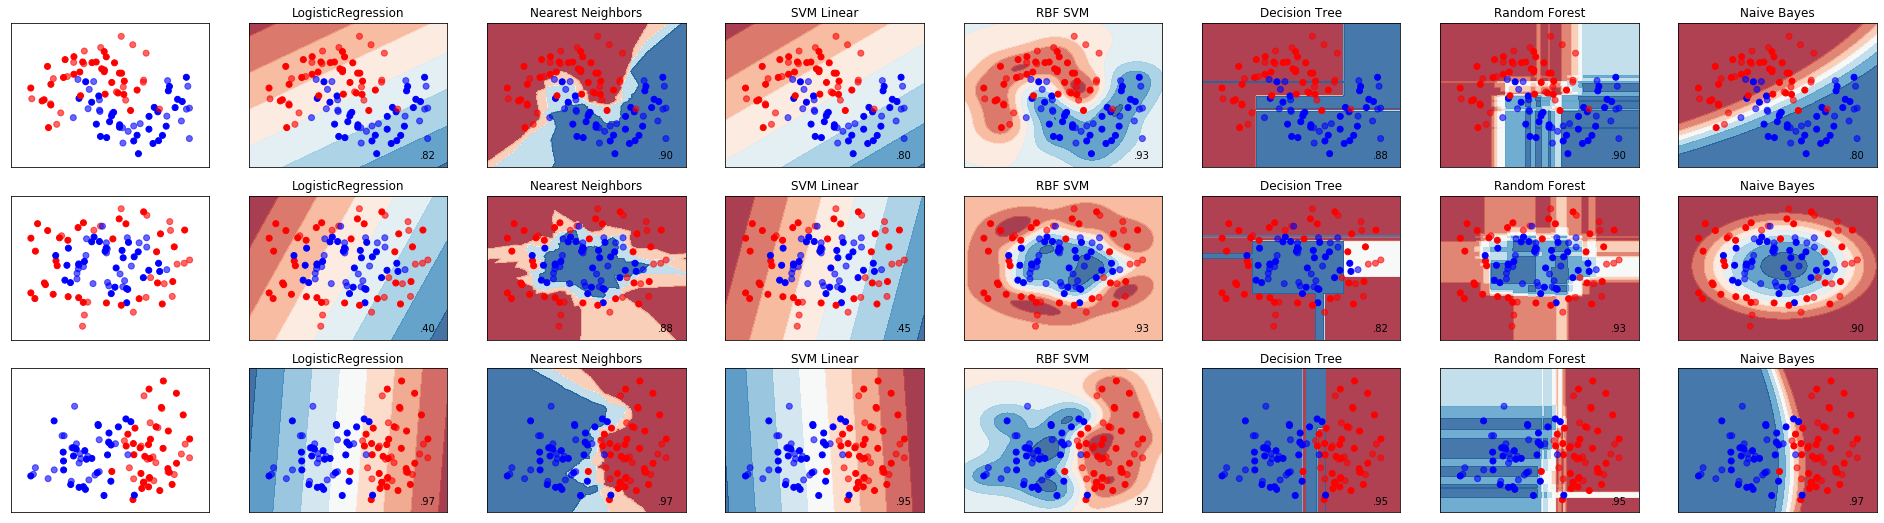

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.lda import LDA
#from sklearn.qda import QDA

h = .02  # step size in the mesh



names = ["LogisticRegression","Nearest Neighbors", "SVM Linear", "RBF SVM", "Decision Tree",
         "Random Forest", "Naive Bayes"]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=10, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()